In [1]:
from eos.relativistic_ISCT import Relativistic_ISCT
from scipy.optimize import fsolve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bugaev, K.A., Emaus, R., Sagun, V.V. et al. Threshold Collision Energy of the QCD Phase Diagram Tricritical Endpoint. Phys. Part. Nuclei Lett. 15, 210–224 (2018). https://doi.org/10.1134/S1547477118030068
G_TOTAL = 1770.
G_FERMION = 140.                # approx 141 in article 
G_BOSON = G_TOTAL - 7./4.*G_FERMION

# Bugaev, K.A., Ivanytskyi, A.I., Oliinychenko, D.R. et al. Thermodynamically anomalous regions as a mixed phase signal. Phys. Part. Nuclei Lett. 12, 238–245 (2015). https://doi.org/10.1134/S1547477115020065
ENTR_TO_BAR_DENS_RATIO = 11.31482

In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
ch_f_df = pd.read_csv('cs_sq_fulldata/chem_f_o_T_mu_digitized.csv').dropna()

In [2]:
df = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_.csv').dropna()
df_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_lgf_10per.csv')
df_nm = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm.csv')
df_nm_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm_lgf_10per.csv')

In [10]:
def qcd_constr(T):
    mu = T*np.pi
    return mu
xdata = np.linspace(ch_f_df['T'].min(), ch_f_df['T'].max())
ydata = qcd_constr(xdata)

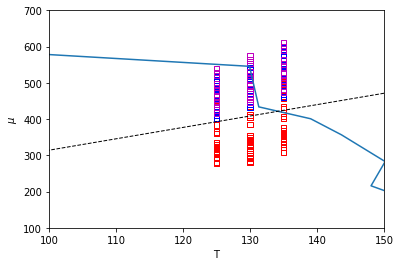

In [11]:
plt.plot(ch_f_df['T'], ch_f_df['mu'])
plt.plot(xdata, ydata, c='k', linestyle='--', linewidth=1)
plt.scatter(df['T'], df['mu'], s=30, marker='s', edgecolor='r', color='None')

plt.scatter(df_nm['T'], df_nm['mu'], s=30, marker='s', edgecolor='b', color='None')
plt.scatter(df_nm_lgf['T'], df_nm_lgf['mu'], s=30, marker='s', edgecolor='m', color='None')

plt.xlim(100,150)
plt.ylim(100,700)

plt.xlabel('T')
plt.ylabel('$\mu$')
# plt.legend(frameon=False)

plt.show()

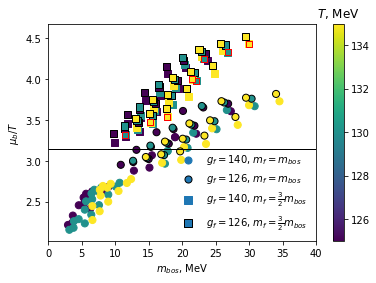

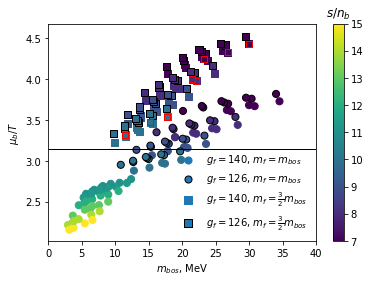

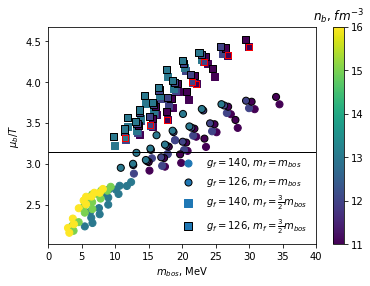

In [14]:
cmaps = ['T', 'entr_per_bar_dens', 'bar_dens']
cbar_labels = ['$T$, MeV', '$s/n_b$', '$n_b$, $fm^{-3}$']

for i in range(len(cmaps)):
    cmap = cmaps[i]
    cbar_label = cbar_labels[i]
    vmin=min(df[cmap].min(), df_lgf[cmap].min(), df_nm[cmap].min(), df_nm_lgf[cmap].min())
    vmax=max(df[cmap].max(), df_lgf[cmap].max(), df_nm[cmap].max(), df_nm_lgf[cmap].max())

    plt.scatter(df['m'], df['mu']/df['T'], c=df[cmap], s=50,
            marker='o', label='$g_f=140$, $m_f=m_{bos}$',
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_lgf['m'], df_lgf['mu']/df_lgf['T'], c=df_lgf[cmap], s=50,
            marker='o', label='$g_f=126$, $m_f=m_{bos}$',
            edgecolors='k', 
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_nm['m'], df_nm['mu']/df_nm['T'], c=df_nm[cmap], s=50,
            marker='s', 
            label='$g_f=140$, $m_f = \\frac{3}{2}m_{bos}$',
            vmin=vmin, vmax=vmax,
            )
    plt.scatter(df_nm_lgf['m'], df_nm_lgf['mu']/df_nm_lgf['T'], c=df_nm_lgf[cmap], s=50,
            marker='s', 
            label='$g_f=126$, $m_f = \\frac{3}{2}m_{bos}$',
            edgecolors='k', 
            vmin=vmin, vmax=vmax,
            )

    plt.scatter(selected_df['m'], selected_df['mu/T'], c=selected_df[cmap], marker='s',
        edgecolors='r',
        # label='selected'
        vmin=vmin, vmax=vmax,
        )
            

    plt.hlines(np.pi, 0, 100, linewidth=1)
    plt.xlim(0,40)
    # plt.ylim(2,)

    plt.xlabel('$m_{bos}$, MeV')
    plt.ylabel('$\\mu_b/T$')
    clb = plt.colorbar()
    clb.ax.set_title(cbar_label)
    plt.legend(frameon=False)
#     plt.savefig(f'visualization/plots/low_m_search_cb_{cmap}_3.pdf')
    plt.show()

# Cumulants

In [45]:
g_array = iter([[140., 1525.], [126., 1550.]])

for df in [df_nm, df_nm_lgf]:
    g = next(g_array)
    df['mu/T'] = df['mu']/df['T']

    Tdata = df['T'].to_numpy()
    m_data = df['m'].to_numpy()
    mu_data = df['mu'].to_numpy()

    cumul_lin_data = []
    cumul_sq_data = []

    for i in range(len(df)):
        T = Tdata[i]
        m = m_data[i]
        mu = mu_data[i]
        eos = Relativistic_ISCT(m=[1.5*m, m], R=0.39, b=0.,  components=2, eos='ISCT', g=g)

        cumul_lin_data.append(
            T*eos.cumulant_per_vol(1, 0, T, mu, 0.)/mu/eos.cumulant_per_vol(2, 0, T, mu, 0.)
        )
        cumul_sq_data.append(
            1. - eos.cumulant_per_vol(3, 0, T, mu, 0.)*eos.cumulant_per_vol(1, 0, T, mu, 0.)/eos.cumulant_per_vol(2, 0, T, mu, 0.)**2
        )
    df['cumul_lin_ratio'] = np.array(cumul_lin_data)
    df['cumul_sq_ratio'] = np.array(cumul_sq_data)

In [72]:
df_nm = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm.csv')
df_nm_lgf = pd.read_csv('cs_sq_fulldata/low_m_search_fixed_bar_dens_nm_lgf_10per.csv')

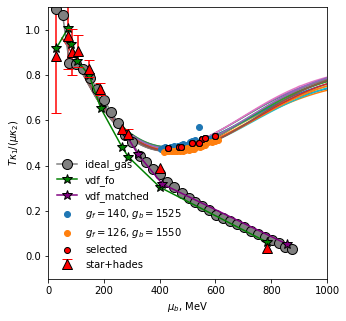

In [223]:
plot_cumul_digit(kind='lin')

plt.scatter(df_nm['mu'], df_nm['cumul_lin_ratio'], label='$g_f=140$, $g_b=1525$')
plt.scatter(df_nm_lgf['mu'], df_nm_lgf['cumul_lin_ratio'], label='$g_f=126$, $g_b=1550$')

plt.scatter(selected_df['mu'], selected_df['cumul_lin_ratio'], c='r', edgecolors='k', label='selected')

plot_selected_cumuls_data(zorder=-1, cleaned=True, filtername='cumul_data2')

plt.legend(frameon=False)
# plt.savefig('visualization/plots/test_cumul_lin.pdf')
plt.show()

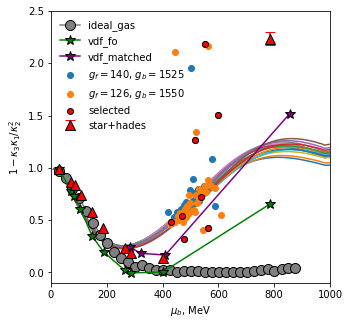

In [81]:
plot_cumul_digit(kind='sq')

plt.scatter(df_nm['mu'], df_nm['cumul_sq_ratio'], label='$g_f=140$, $g_b=1525$')
plt.scatter(df_nm_lgf['mu'], df_nm_lgf['cumul_sq_ratio'], label='$g_f=126$, $g_b=1550$')

plt.scatter(selected_df['mu'], selected_df['cumul_sq_ratio'], c='r', edgecolors='k', label='selected')

# plot_selected_cumuls_data(kind='sq', zorder=-1, cleaned=True, filtername='cumul_data2')
plot_selected_cumuls_data2(kind='sq', zorder=-1,  filtername='cumul_data2')

plt.legend(frameon=False)
# plt.savefig('visualization/plots/test_cumul_sq.pdf')
plt.show()

In [2]:
import os
from visualization.utils import clean_outliers_and_mask

def read_params_from_cumul_data(name):
    for el in ['cumul_data_matched_2_', 'cumul_data_exp_fo_2_', 'cumul_data_T_', 'cumul_data2_T_', 'cumul_data_matched_', 'cumul_data_exp_fo_', 'm_bos_', 'g_fer_', 'g_bos_', '_.csv',]:
        name = name.replace(el, '')
    # T, m, g_fer, g_bos = name.split('_')
    # return float(T), float(m), float(g_fer), float(g_bos)
    return (float(el) for el in name.split('_'))


def plot_selected_cumuls_data2(kind='lin', filtername='cumul_data', labeled=False,**kwargs):
    if kind == 'lin':
        label = 'k_lin_ratio'
    elif kind == 'sq':
        label = 'k_sq_ratio'
    else:
        raise Exception('Wrong kind specified')

    for name in os.listdir('cs_sq_fulldata/cumuls'):
        if filtername in name:
            df = pd.read_csv(os.path.join('cs_sq_fulldata/cumuls', name))
            # plt.scatter(df['mu'], df[label], c='y', zorder=-1)

            T, m, g_fer, g_bos = read_params_from_cumul_data(name)
            labelname = '$T={}$, $m={:.2f}$, $g_f={}$, $g_'.format(T, m, g_fer) + '{bos}' + '={}$'.format(g_bos)
            eos = Relativistic_ISCT(m=[1.5*m, m], R=0.39, b=0.,  components=2, eos='ISCT', g=[g_fer, g_bos])
            # m, g_fer, g_bos = read_params_from_cumul_data(name)
            # labelname = '$m={:.2f}$, $g_f={}$, $g_'.format(m, g_fer) + '{bos}' + '={}$'.format(g_bos)

            # plt.plot(df['mu'], df[label], label=labelname if labeled else None, **kwargs)
            plt.plot(
                df['mu'],
                eos.splined_cumul_sq_ratio(T, df['mu'], 0., splinedata=(df['mu'], df['p'])),
                label=labelname if labeled else None, **kwargs
            )
            # plot selected points
            # df = selected_df[selected_df['m']==m]
            # plt.scatter(df['mu'], df[label.replace('k_', 'cumul_')], c='r', edgecolors='k')            

            # plt.ylim(-0.1, 2.5)
            # plt.xlim(0, 1000)
            # if labeled:
            #     plt.legend(frameon=False)
            # plt.show()

In [3]:
def plot_cumul_digit(kind='lin'):
    plt.figure(figsize=(5,5))

    if kind=='lin':
        col_name = 'cumul_lin'
        error_name = 'error_lin'
    elif kind=='sq':
        col_name = 'cumul_sq'
        error_name = 'error_sq'
    else:
        raise Exception('Wrong kind specified')


    names = [ 'ideal_gas', 'vdf_fo', 'vdf_matched', 'star+hades']
    colors = iter(['grey','g', 'purple', 'r'])
    markers = iter(['o', '*', '*', '^'])

    for name in names:
        df = pd.read_csv(f'cs_sq_fulldata/cumuls/cumuls_{name}_digit_.csv')

        color = next(colors)
        marker = next(markers)
        if name == 'star+hades':
            plt.errorbar(df['mu'], df[col_name], yerr=df[error_name], 
                label=name, c=color, marker=marker, markeredgecolor='k', markersize=10, 
                capsize=5,
                linestyle='',
                # zorder=2,
                )
        else:
            plt.plot(df['mu'], df[col_name], c=color, label=name, 
                    marker=marker, markersize=10, markeredgecolor='k',
                    # zorder=1,
                    )
        

    plt.xlim(0, 1000)
    if kind=='lin':
        plt.ylim(-0.1, 1.1)
    elif kind=='sq':
        plt.ylim(-0.1, 2.5)


    

    plt.xlabel('$\\mu_b$, MeV')
    if kind=='lin':
        plt.ylabel('$T \\kappa_1 / (\\mu \\kappa_2)$')
    elif kind=='sq':
        plt.ylabel('$1 - \\kappa_3 \\kappa_1 / \\kappa_2^2$')

    plt.legend(frameon=False)    

In [8]:
df_nm[df_nm['T']==130.].sort_values('mu/T')

,T,bar_dens,entr_per_bar_dens,m,mu,mu/T,cumul_lin_ratio,cumul_sq_ratio
23,130.0,13.0,10.0,11.481923,431.598470,3.319988,0.479318,0.483617
19,130.0,12.0,10.0,13.345573,439.831908,3.383322,0.480566,0.507756
15,130.0,11.0,10.0,15.640397,448.752852,3.451945,0.481830,0.530801
22,130.0,13.0,9.0,13.733954,462.231710,3.555629,0.483214,0.558546
18,130.0,12.0,9.0,15.872037,470.769514,3.621304,0.485381,0.583587
14,130.0,11.0,9.0,18.498605,480.030820,3.692545,0.487666,0.584109
21,130.0,13.0,8.0,16.585754,498.308920,3.833146,0.492827,0.790640
17,130.0,12.0,8.0,19.066202,507.293277,3.902256,0.496188,0.684575
13,130.0,11.0,8.0,22.106452,517.058943,3.977376,0.499971,1.261895
20,130.0,13.0,7.0,20.291901,542.293467,4.171488,0.569321,-426.885408


In [74]:
selected_df = pd.DataFrame()

selected_df = selected_df.append(
    df_nm.iloc[[23, 13, 16, 12, 31, 27, 29, 24]]
)

selected_df

,T,bar_dens,entr_per_bar_dens,m,mu,mu/T,cumul_lin_ratio,cumul_sq_ratio
23,130.0,13.0,10.0,11.481923,431.598470,3.319988,0.479318,0.483617
13,130.0,11.0,8.0,22.106452,517.058943,3.977376,0.499971,1.261895
16,130.0,12.0,7.0,23.213170,551.985329,4.246041,0.516556,2.185266
12,130.0,11.0,7.0,26.786362,562.561650,4.327397,0.521567,0.424353
31,135.0,12.0,10.0,15.247183,468.361377,3.469344,0.482485,0.538232
27,135.0,11.0,10.0,17.773020,477.538357,3.537321,0.483629,0.319450
29,135.0,12.0,8.0,21.500497,539.394028,3.995511,0.501265,0.722795
24,135.0,11.0,7.0,29.933830,597.769544,4.427923,0.529143,1.501019


In [150]:
# selected_df.to_csv('cs_sq_fulldata/low_m_selected_points_.csv', index=False)

In [4]:
import os
from visualization.utils import clean_outliers_and_mask

def read_params_from_cumul_data(name):
    for el in ['cumul_data_matched_2_', 'cumul_data_exp_fo_2_', 'cumul_data_T_', 'cumul_data2_T_', 'cumul_data_matched_', 'cumul_data_exp_fo_', 'm_bos_', 'g_fer_', 'g_bos_', '_.csv',]:
        name = name.replace(el, '')
    # T, m, g_fer, g_bos = name.split('_')
    # return float(T), float(m), float(g_fer), float(g_bos)
    return (float(el) for el in name.split('_'))


def plot_selected_cumuls_data(kind='lin', filtername='cumul_data', cleaned=False, labeled=False, masked=False, **kwargs):
    if kind == 'lin':
        label = 'k_lin_ratio'
    elif kind == 'sq':
        label = 'k_sq_ratio'
    else:
        raise Exception('Wrong kind specified')

    for name in os.listdir('cs_sq_fulldata/cumuls'):
        if filtername in name:
            df = pd.read_csv(os.path.join('cs_sq_fulldata/cumuls', name))
            # plt.scatter(df['mu'], df[label], c='y', zorder=-1)

            if masked:
                # mask = df['mu'][df['mu']<=1000.]>100.
                # mask = df['mu']>=0.
                # mask = df['mu']<=1000.
                mask = np.logical_and(
                    df['k_sq_ratio']>0.,
                    df['k_sq_ratio']<1.5,
                )
                df = df[mask]

            if cleaned:
                # df = clean_outliers_and_mask(df, label=label)
                df = clean_outliers_and_mask(df, label=label, window=3, threshold=1e-6, repeats=2)

            # T, m, g_fer, g_bos = read_params_from_cumul_data(name)
            # labelname = '$T={}$, $m={:.2f}$, $g_f={}$, $g_'.format(T, m, g_fer) + '{bos}' + '={}$'.format(g_bos)
            m, g_fer, g_bos = read_params_from_cumul_data(name)
            labelname = '$m={:.2f}$, $g_f={}$, $g_'.format(m, g_fer) + '{bos}' + '={}$'.format(g_bos)

            plt.plot(df['mu'], df[label], label=labelname if labeled else None, **kwargs)
            # plot selected points
            df = selected_df[selected_df['m']==m]
            plt.scatter(df['mu'], df[label.replace('k_', 'cumul_')], c='r', edgecolors='k')            

            plt.ylim(-0.1, 2.5)
            plt.xlim(0, 1000)
            if labeled:
                plt.legend(frameon=False)
            plt.show()

In [4]:
df = pd.read_csv('cs_sq_fulldata/cumuls/cumul_data2_T_135.0_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')

In [5]:
df

,K,Sigma,k1_per_V,k2_per_V,k3_per_V,k_lin_ratio,k_sq_ratio,mu,p
0,55.988873,129.596427,0.052155,0.704583,-18.647484,0.999299,2.959069,10.0,3853.555760
1,56.002737,129.637485,0.104553,0.709848,-8.287770,0.994208,2.719673,20.0,3854.338999
2,56.025904,129.706102,0.157441,0.718319,4.143885,0.986305,-0.264413,30.0,3855.648457
3,56.058466,129.802559,0.211061,0.729124,-73.553963,0.976970,30.201957,40.0,3857.490253
4,56.100552,129.927247,0.265663,0.745094,-127.424471,0.962686,61.976576,50.0,3859.872957
...,...,...,...,...,...,...,...,...,...
95,130.137057,371.458886,23.129602,4.222480,0.030876,0.770306,0.959945,960.0,12308.861357
96,131.471549,376.097278,23.441944,4.211255,-0.173763,0.774719,1.229682,970.0,12541.719826
97,132.807018,380.748661,23.753437,4.199847,-0.181393,0.779113,1.244276,980.0,12777.697427
98,134.143342,385.412671,24.064135,4.189171,-0.330849,0.783323,1.453674,990.0,13016.785939


In [28]:
T, m_bos, g_fer, g_bos = read_params_from_cumul_data('cumul_data2_T_135.0_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')
print(
'''
T = {}
m_bos = 29{}
g_fer = {}
g_bos = {}
'''
.format(T, m_bos, g_fer, g_bos))
eos = Relativistic_ISCT(m=[1.5*m_bos, m_bos], R=0.39, b=0.,  components=2, eos='ISCT', g=[g_fer, g_bos])


T = 135.0
m_bos = 2929.93382977815157
g_fer = 140.0
g_bos = 1525.0



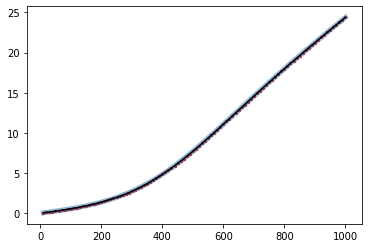

In [51]:
plt.plot(df['mu'], [c1(mu) for mu in df['mu']], linewidth=5, alpha=0.5)
plt.plot(
    df['mu'],
    eos.splined_cumul_per_vol(1, T, df['mu'], 0, splinedata=(df['mu'], df['p'])), c='k'
)
plt.scatter(df['mu'], df['k1_per_V'], s=5, c='r')
plt.show()

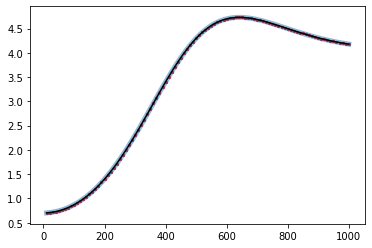

In [52]:
plt.plot(df['mu'], [c2(mu) for mu in df['mu']], linewidth=5, alpha=0.5)
plt.plot(
    df['mu'],
    eos.splined_cumul_per_vol(2, T, df['mu'], 0, splinedata=(df['mu'], df['p'])), c='k'
)
plt.scatter(df['mu'], df['k2_per_V'], s=5, c='r')
plt.show()

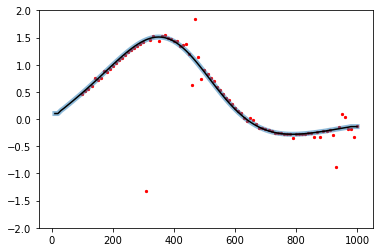

In [63]:
plt.plot(df['mu'], [c3(mu) for mu in df['mu']], linewidth=5, alpha=0.5)
plt.plot(
    df['mu'],
    eos.splined_cumul_per_vol(3, 0, T, df['mu'], 0, splinedata=(df['mu'], df['p'])), c='k'
)
plt.scatter(df['mu'], df['k3_per_V'], s=5, c='r')
plt.ylim(-2, 2)
plt.show()

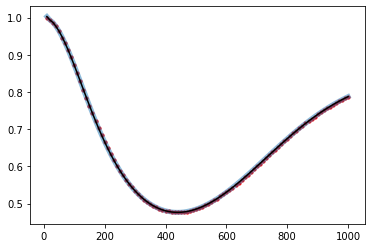

In [18]:
plt.plot(df['mu'], [c_lin_ratio(mu) for mu in df['mu']], linewidth=5, alpha=0.5)
plt.plot(
    df['mu'],
    eos.splined_cumul_lin_ratio(T, df['mu'], 0, splinedata=(df['mu'], df['p'])), c='k'
)
plt.scatter(df['mu'], df['k_lin_ratio'], s=10, c='r')
plt.show()

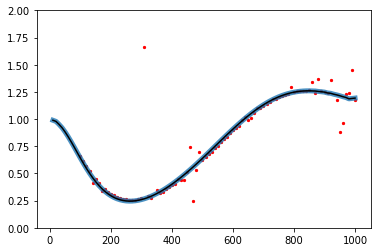

In [67]:
plt.plot(df['mu'], [c_sq_ratio(mu) for mu in df['mu']], alpha=0.8, linewidth=5)
plt.plot(
    df['mu'],
    eos.splined_cumul_sq_ratio(T, df['mu'], 0, splinedata=(df['mu'], df['p'])), c='k'
)
plt.scatter(df['mu'], df['k_sq_ratio'], s=5, c='r')
plt.ylim(0, 2)
plt.show()

In [7]:
eos = Relativistic_ISCT(m=[1.5*m_bos, m_bos], R=0.39, b=0.,  components=2, eos='ISCT', g=[g_fer, g_bos])

In [16]:
%%timeit -n 1 -r1 
eos.entropy(100., 100., 0., order=5)

50 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
%%timeit -n 1 -r 1
eos.splined_entropy(100., 100., 0.)

41.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
import os

os.system('py splined_cumulants.py {} {} {}'.format(m_bos, g_fer, g_bos))

In [10]:
import pandas as pd
df_exp = pd.read_csv('cs_sq_fulldata/cumuls/splined_cumul_data_exp_fo_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')
df_matched = pd.read_csv('cs_sq_fulldata/cumuls/splined_cumul_data_matched_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')

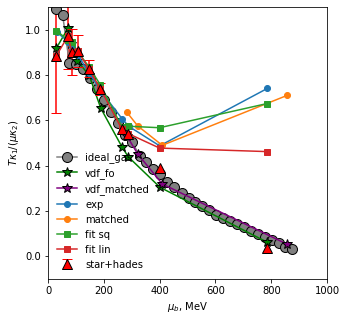

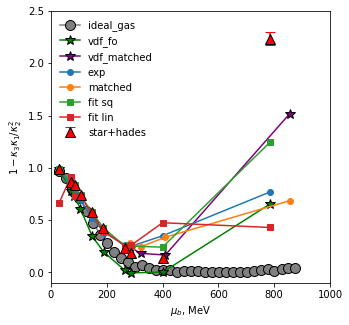

In [19]:
import matplotlib.pyplot as plt

for kind in ['lin', 'sq']:
    plot_cumul_digit(kind=kind)

    plt.plot(df_exp['mu'], df_exp['k_{}_ratio'.format(kind)], label='exp',
            marker='o',
            )
    plt.plot(df_matched['mu'], df_matched['k_{}_ratio'.format(kind)], label='matched',
            marker='o',
            )

    plt.plot(df_fit['mu'], df_fit[f'cumul_{kind}_ratio'], marker='s', label='fit sq')
    plt.plot(df_fit_lin['mu'], df_fit_lin[f'cumul_{kind}_ratio'], marker='s', label='fit lin')

    plt.legend(frameon=False, loc='lower left' if kind=='lin' else None)
#     plt.savefig(f'visualization/plots/cumul_{kind}_ratio_with_fit.pdf')
    plt.show()

In [5]:
phase_diag_exp = pd.read_csv('cs_sq_fulldata/cumuls/T_mu_phase_diagr_exp_fo_.csv')
phase_diag_matched = pd.read_csv('cs_sq_fulldata/cumuls/T_mu_phase_diagr_matched_.csv')
cumuls_exp = pd.read_csv('cs_sq_fulldata/cumuls/cumuls_star+hades_digit_.csv')

In [6]:
# df1 = pd.read_csv('cs_sq_fulldata/cumuls/fo_temp_search_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')
# df2 = pd.read_csv('cs_sq_fulldata/cumuls/fo_temp_search2_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')
# df3 = pd.read_csv('cs_sq_fulldata/cumuls/fo_temp_search3_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')

df_fit = pd.read_csv('cs_sq_fulldata/cumuls/fo_temp_search4_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')
df_fit_lin = pd.read_csv('cs_sq_fulldata/cumuls/fo_temp_search_lin_fit_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv')

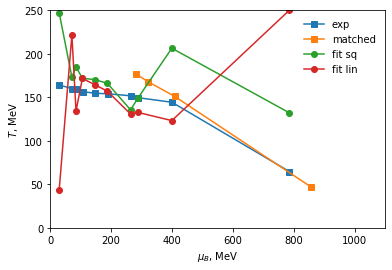

In [20]:
plt.plot(phase_diag_exp['mu'], phase_diag_exp['T'], label='exp', marker='s')
plt.plot(phase_diag_matched['mu'], phase_diag_matched['T'], label='matched', marker='s')
# for df, label in zip([df1, df2, df3], ['fit 200', 'fit 150', 'fit 175']):
#     plt.scatter(df['mu'], df['T'], label=label)

# plt.scatter(df_fit['mu'], df_fit['T'], c='r', label='fit sq')
# plt.scatter(df_fit_lin['mu'], df_fit_lin['T'], c='k', label='fit lin')
plt.plot(df_fit['mu'], df_fit['T'], label='fit sq', marker='o')
plt.plot(df_fit_lin['mu'], df_fit_lin['T'], label='fit lin', marker='o')

plt.ylim(0, 250)
plt.xlim(0, 1100)
plt.xlabel('$\mu_B$, MeV')
plt.ylabel('$T$, MeV')
plt.legend(frameon=False)
# plt.savefig('visualization/plots/phase_diagr_with_fit.pdf')
plt.show()

In [15]:
import glob

mu_data = []
Tdata = []

drop = ['array([', '])']

for filename in glob.glob('slurm-*'):
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            if 'mu' in line:
                mu_data.append(
                    float(line.split()[1])
                )
            elif 'x' in line:
                string = line.split()[1]
                for el in drop:
                    string = string.replace(el, '')
                Tdata.append(
                    float(string)
                )

In [2]:
import glob

In [14]:
Tdata = []
for filename in glob.glob('slurm-*'):
    # print(filename)
    with open(filename) as f:
        for line in f:
            # print(line)
            if 'x:' in line:
                # print(line)
                val = float(line.split()[1])
                Tdata.append(val)
                # print(val)

In [36]:
k1_data = []
k2_data = []
k3_data = []
cumul_lin_ratio = []
cumul_sq_ratio = []


for T, mu in zip(Tdata, cumuls_exp['mu']):
    k1_data.append(eos.splined_cumul_per_vol(1, 0, T, mu, 0.))
    k2_data.append(eos.splined_cumul_per_vol(2, 0, T, mu, 0.))
    k3_data.append(eos.splined_cumul_per_vol(3, 0, T, mu, 0.))
    cumul_lin_ratio.append(eos.splined_cumul_lin_ratio(T, mu, 0.))
    cumul_sq_ratio.append(eos.splined_cumul_sq_ratio(T, mu, 0.))

In [39]:
df = pd.DataFrame({
    'T': Tdata,
    'mu': cumuls_exp['mu'], 
    'k1_data': k1_data,
    'k2_data': k2_data,
    'k3_data': k3_data,
    'cumul_lin_ratio': cumul_lin_ratio,
    'cumul_sq_ratio': cumul_sq_ratio
})

In [40]:
df

,T,mu,k1_data,k2_data,k3_data,cumul_lin_ratio,cumul_sq_ratio
0,247.408407,29.398112,0.178309,1.506774,0.165740,0.995909,0.986983
1,173.207298,71.253136,0.410747,1.046132,0.358837,0.954444,0.865321
2,184.998614,84.840092,0.500130,1.155205,0.435264,0.944041,0.836876
3,171.930024,105.823521,0.626922,1.125158,0.534752,0.905253,0.735187
4,170.396610,145.865386,0.904498,1.263192,0.746933,0.836463,0.576600
5,166.165681,187.768414,1.240881,1.452631,0.976348,0.755951,0.425852
6,135.504603,264.193822,2.164586,1.940953,1.300034,0.571994,0.253036
7,148.802726,287.549577,2.420043,2.183614,1.475150,0.573516,0.251301
8,206.443564,399.663703,3.698062,3.368919,2.329635,0.567009,0.240931
9,132.286990,785.313582,17.526479,4.381599,-0.268817,0.673808,1.245406


In [44]:
# df.to_csv('cs_sq_fulldata/cumuls/fo_temp_search4_m_bos_29.93382977815157_g_fer_140.0_g_bos_1525.0_.csv', index=False)

In [3]:
import os
import pandas as pd

folder = 'cs_sq_fulldata/grid_tables/'

In [8]:
keys = ['T', 'mu', 'p', 'Sigma', 'K', 'density', 'entropy']

In [11]:
for name in os.listdir(folder):
    path = os.path.join(folder, name)
    df = pd.read_csv(path)
    newpath = path.replace('csv', 'txt')
    df[keys].to_csv(newpath, index=False, sep=' ')
    

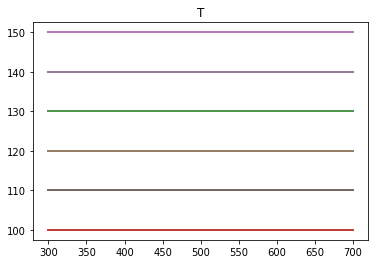

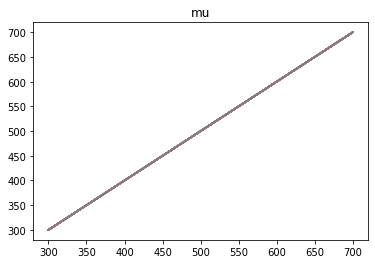

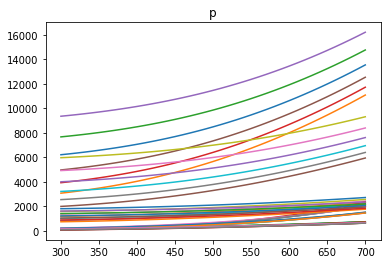

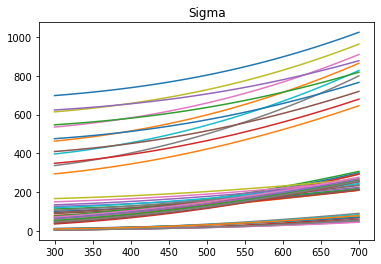

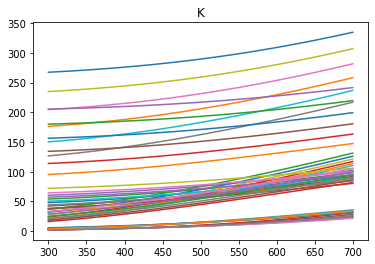

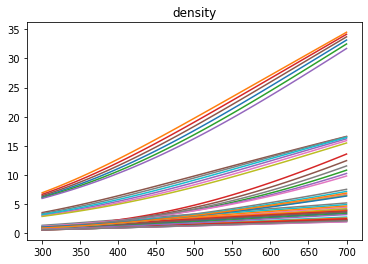

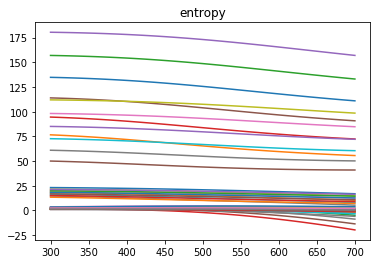

In [44]:
import matplotlib.pyplot as plt

for key in keys:
    for name in os.listdir(folder):
        if 'csv' in name:
            path = os.path.join(folder, name)
            df = pd.read_csv(path)
            Tdata = set(df['T'])
            for T in Tdata:
                filter = df['T']==T
                plt.plot(df[filter]['mu'], df[filter][key], label=T)
    plt.title(key)
    # plt.legend()
    plt.show()    
